In [ ]:
pip install -U scikit-learn

## 0. Index

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers

# 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
df = pd.read_csv(r'C:\Users\Josepa Cusidó\EU_Drugs_Wastewater\02 Data\Wastewater drug residues_CLEAN.csv', index_col = False)

# 2. Data cleaning

In [4]:
df.columns

Index(['Unnamed: 0', 'year', 'metabolite', 'SiteID', 'country', 'city',
       'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday', 'Weekday mean', 'Weekend mean', 'Daily mean'],
      dtype='object')

In [6]:
df = df.drop(columns=['Unnamed: 0'])

In [7]:
df.head(20)

,year,metabolite,SiteID,country,city,Wednesday,Thursday,Friday,Saturday,Sunday,Monday,Tuesday,Weekday mean,Weekend mean,Daily mean
0,2021,amphetamine,AT001,AT,Graz,47.15,37.48,37.95,38.02,38.14,35.82,35.45,40.03,37.48,38.57
1,2021,amphetamine,AT002,AT,Hall-Wattens,8.37,7.08,6.88,4.25,6.17,8.25,7.77,7.74,6.39,6.97
2,2021,amphetamine,AT004,AT,Innsbruck,16.59,16.72,17.60,24.92,29.69,22.38,26.24,19.85,23.65,22.02
3,2021,amphetamine,AT005,AT,Kapfenberg,25.01,24.11,30.52,31.85,36.75,35.58,22.43,23.85,33.68,29.46
4,2021,amphetamine,AT007,AT,Kufstein,24.24,16.19,19.70,10.93,22.68,20.69,24.18,21.54,18.50,19.80
5,2021,amphetamine,AT010,AT,Purgstall,32.44,17.96,28.18,16.98,22.95,24.59,20.98,23.79,23.18,23.44
6,2021,amphetamine,AT008,AT,Region Millstättersee,3.37,5.78,3.16,4.17,4.96,2.43,10.70,6.62,3.68,4.94
7,2021,amphetamine,AT011,AT,Strass im Zillertal,11.25,13.02,17.97,11.38,13.82,11.98,12.26,12.18,13.79,13.10
8,2021,amphetamine,AT003,AT,Wasserverband Hofsteig,41.57,13.91,29.01,18.21,40.29,17.44,23.82,26.43,26.24,26.32
9,2021,amphetamine,BE002,BE,Antwerp Zuid,441.07,371.17,425.28,470.05,416.27,444.17,414.67,408.97,438.94,426.10


In [8]:
df.shape

(2316, 15)

In [9]:
# Missing values
df.isnull().sum()

year            0
metabolite      0
SiteID          0
country         0
city            0
Wednesday       0
Thursday        0
Friday          0
Saturday        0
Sunday          0
Monday          0
Tuesday         0
Weekday mean    0
Weekend mean    0
Daily mean      0
dtype: int64

In [10]:
# Duplicates
dups = df.duplicated()

In [11]:
dups.shape # No dups

(2316,)

<AxesSubplot:xlabel='Friday', ylabel='Count'>

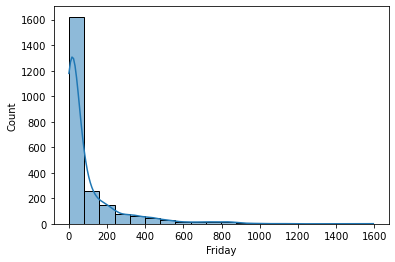

In [38]:
# Extreme values checks
sns.histplot(df['Friday'], bins=20, kde = True)

In [39]:
# Check how many extreme values
df[df['Friday'] >1000] # Before deleting this extreme values, we should double check with experts, if they are possible.

,year,metabolite,SiteID,country,city,Wednesday,Thursday,Friday,Saturday,Sunday,Monday,Tuesday,Weekday mean,Weekend mean,Daily mean
115,2021,cocaine,BE002,BE,Antwerp Zuid,1335.68,1307.06,1594.08,1806.01,1631.20,1770.91,1628.19,1423.64,1700.55,1581.88
120,2021,cocaine,CH007,CH,St. Gallen Hofen,650.07,876.23,1074.84,1073.20,1035.85,782.24,725.06,750.46,991.53,888.22
454,2020,cocaine,BE002,BE,Antwerp Zuid,1049.69,949.03,1126.59,1201.26,2090.15,789.02,1018.39,1005.70,1301.75,1174.88


<AxesSubplot:xlabel='Thursday', ylabel='Count'>

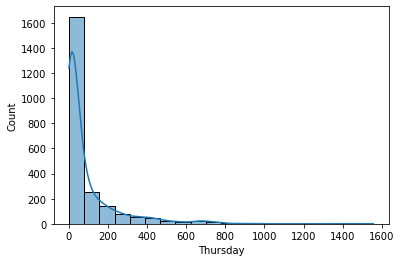

In [40]:
# Extreme values checks
sns.histplot(df['Thursday'], bins=20, kde = True)

In [41]:
# Check how many extreme values
df[df['Friday'] >1000] # Before deleting this extreme values, we should double check with experts, if they are possible.

,year,metabolite,SiteID,country,city,Wednesday,Thursday,Friday,Saturday,Sunday,Monday,Tuesday,Weekday mean,Weekend mean,Daily mean
115,2021,cocaine,BE002,BE,Antwerp Zuid,1335.68,1307.06,1594.08,1806.01,1631.20,1770.91,1628.19,1423.64,1700.55,1581.88
120,2021,cocaine,CH007,CH,St. Gallen Hofen,650.07,876.23,1074.84,1073.20,1035.85,782.24,725.06,750.46,991.53,888.22
454,2020,cocaine,BE002,BE,Antwerp Zuid,1049.69,949.03,1126.59,1201.26,2090.15,789.02,1018.39,1005.70,1301.75,1174.88


# 3. Data preparation for regression analysis

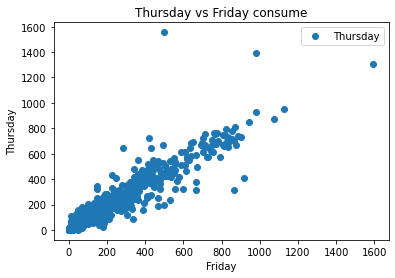

In [17]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df.plot(x = 'Friday', y='Thursday',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Friday vs Thursday consume')  
plt.xlabel('Friday')  
plt.ylabel('Thursday')  
plt.show()

In [18]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['Friday'].values.reshape(-1,1)
y = df['Thursday'].values.reshape(-1,1)

In [20]:
X

array([[ 37.95],
       [  6.88],
       [ 17.6 ],
       ...,
       [ 48.55],
       [231.06],
       [  3.82]])

In [21]:
y

array([[ 37.48],
       [  7.08],
       [ 16.72],
       ...,
       [ 41.37],
       [212.6 ],
       [  4.37]])

In [22]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 4. Regression analysis

In [25]:
# Create a regression object.
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [26]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [27]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

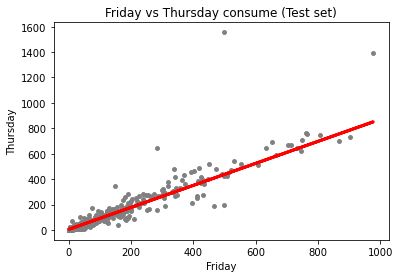

In [28]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Friday vs Thursday consume (Test set)')
plot_test.xlabel('Friday')
plot_test.ylabel('Thursday')
plot_test.show()

It seems that the line does not completely fits the data. 

In [29]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [30]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.86550366]]
Mean squared error:  3418.839290572002
R2 score:  0.8539557474822297


In [31]:
y_predicted

array([[  9.99689394],
       [  7.46962323],
       [ 27.51468811],
       [ 43.94194767],
       [ 13.58007911],
       [ 10.90567278],
       [154.84758728],
       [ 14.75716409],
       [ 12.02217251],
       [ 19.43953892],
       [  7.94565025],
       [178.69221325],
       [ 35.28691102],
       [  7.10611169],
       [ 14.25517197],
       [  5.55686013],
       [149.82766603],
       [ 42.81679291],
       [ 19.43953892],
       [ 83.19253887],
       [ 94.75566783],
       [ 12.86171107],
       [ 36.83616258],
       [ 81.59135709],
       [394.89502872],
       [ 23.86226265],
       [ 24.20846411],
       [ 28.27633134],
       [ 14.9475749 ],
       [ 70.78121632],
       [  7.33979768],
       [ 52.32867818],
       [ 27.47141293],
       [103.52321996],
       [ 20.43486813],
       [118.12426678],
       [206.30178016],
       [360.73359907],
       [ 45.9326061 ],
       [326.21731292],
       [ 22.06201502],
       [ 23.42085578],
       [ 50.99580254],
       [ 42

In [32]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,6.51,9.996894
1,1.23,7.469623
2,10.21,27.514688
3,45.34,43.941948
4,3.63,13.580079
5,11.08,10.905673
6,171.51,154.847587
7,10.98,14.757164
8,7.92,12.022173
9,10.06,19.439539


The actual and the predicted values for y (Thursday) do not match. The relationship doesn’t follow a single, straight regression line. 

In [34]:
#Compare how the regression fits the training set
# Predict.
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [35]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [36]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.86550366]]
Mean squared error:  1419.5947551938568
R2 score:  0.9377425837586074


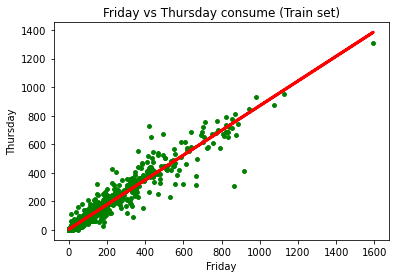

In [37]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Friday vs Thursday consume (Train set)')
plot_test.xlabel('Friday')
plot_test.ylabel('Thursday')
plot_test.show()

# Bonus: performance improvement after removing outliers

In [53]:
# Clean the extreme values from the "Friday" variable observed during the consistency checks.

df_test = df[df['Thursday'] <=800] 

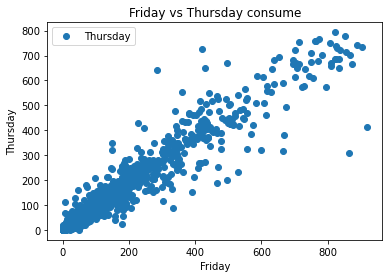

In [54]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'Friday', y='Thursday', style='o')  
plt.title('Friday vs Thursday consume')  
plt.xlabel('Friday')  
plt.ylabel('Thursday')  
plt.show()

In [55]:
# Reshape again.
X_2 = df_test['Friday'].values.reshape(-1,1)
y_2 = df_test['Thursday'].values.reshape(-1,1)

In [56]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [57]:
# Run and fit the regression.
regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [58]:
# Predict.
y_predicted_2 = regression.predict(X_test_2)

In [59]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [60]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.87611469]]
Mean squared error:  843.9056788674436
R2 score:  0.9488127627517016


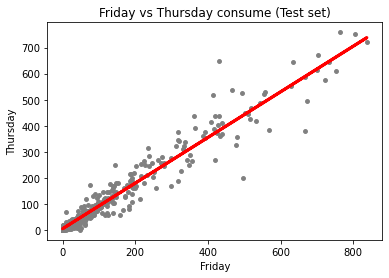

In [61]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Friday vs Thursday consume (Test set)')
plot_test.xlabel('Friday')
plot_test.ylabel('Thursday')
plot_test.show()

In [62]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,14.11,17.000844
1,4.37,7.749073
2,11.08,10.666534
3,1.00,47.612291
4,98.28,103.429557
5,0.33,5.103206
6,32.77,32.087538
7,49.96,50.117979
8,588.15,588.113723
9,117.87,190.997220


The actual and the predicted values for y after removing outliers are a bit more similar but they still do not match. 